# Preparing the plot: Reading the map file

In [29]:
url = 'https://github.com/DACSS690C-CSSMETHODS/HW1/raw/refs/heads/main/maps/countriesCIA.gpkg'

import geopandas as gpd

# read the data
countriesCIA = gpd.read_file(url, layer='cia')
worldBorders = gpd.read_file(url, layer='border')

# see some rows
countriesCIA.head()

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,obesity_levels,obesity_code,geometry
0,Afghanistan,Afghanistan,South Asia,5.5,23.3,0.01,2,3.average,3.(15-30],0,1.very low,2. low,1,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
1,Algeria,Algeria,Africa,27.4,21.0,0.59,2,3.average,3.(15-30],0,1.very low,3. average,2,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
2,Azerbaijan,Azerbaijan,Middle East,19.9,24.0,1.38,2,3.average,3.(15-30],0,1.very low,3. average,2,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
3,Albania,Albania,Europe,21.7,22.4,4.40,2,3.average,3.(15-30],2,3.average,3. average,2,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."
4,Armenia,Armenia,Middle East,20.2,25.5,3.77,2,3.average,3.(15-30],1,2.low,3. average,2,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."


In [30]:
#seeing the layers in the file
gpd.list_layers(url)

,name,geometry_type
0,cia,MultiPolygon
1,border,MultiPolygon


# Creating the non-interactive plot

In [28]:
#now we can see what countries are doing the best in all three variables 
healthycountries = countriesCIA[(countriesCIA.obesity_code == 0) & (countriesCIA.tobacco_code == 0) & (countriesCIA.alcohol_code == 0)]
healthycountries

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,obesity_levels,obesity_code,geometry
42,Eritrea,Eritrea,Africa,5.0,7.5,0.93,0,1.very low,2.(5-15],0,1.very low,1. very low,0,"MULTIPOLYGON (((42.06777 13.69778, 42.09027 13..."
44,Ethiopia,Ethiopia,Africa,4.5,5.1,1.16,0,1.very low,2.(5-15],0,1.very low,1. very low,0,"MULTIPOLYGON (((45.4894 5.48976, 45.37447 5.36..."


<Axes: >

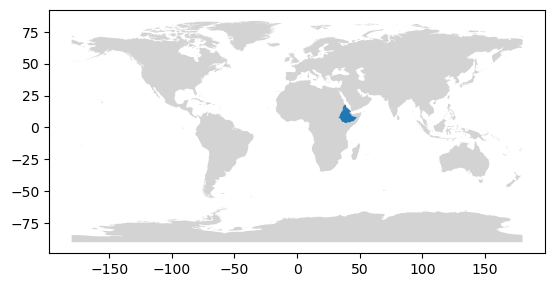

In [31]:
#these are the countries:
base=worldBorders.plot(color='lightgrey')
healthycountries.plot(ax=base)

<Axes: >

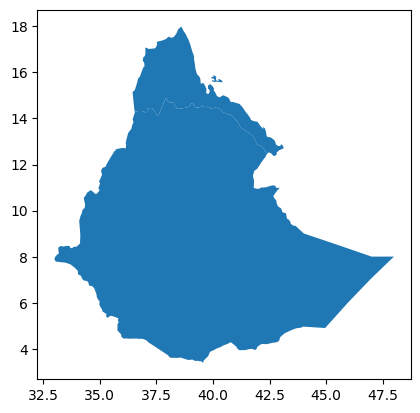

In [32]:
#we need to alter the basemap for an area like this:
countriesCIA[(countriesCIA.obesity_code == 0) & (countriesCIA.tobacco_code == 0) & (countriesCIA.alcohol_code == 0)].plot()

<Axes: >

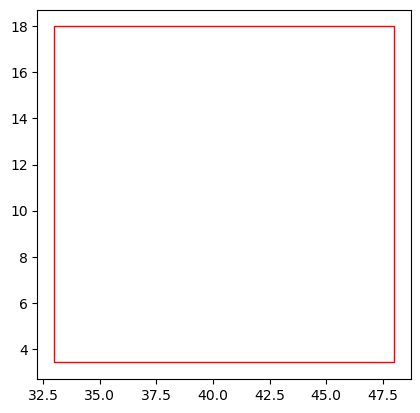

In [33]:
#finding the rectangle with our polygons
maskToClip=healthycountries.dissolve().envelope
maskToClip.plot(color='white',edgecolor='red')

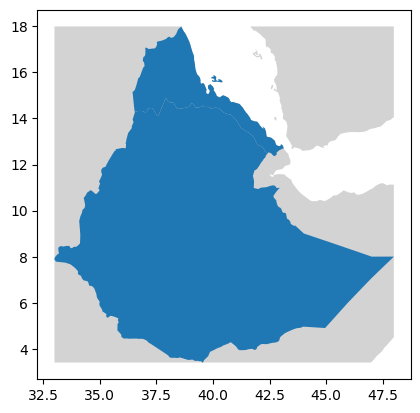

In [35]:
#new map
import matplotlib.pyplot as plt

miniWorld=worldBorders.clip(maskToClip)

base=miniWorld.plot(color='lightgrey')

healthycountries.plot(ax=base)
plt.show()

In [36]:
#getting the coordinates for the country names
allCoords=[x.coords[:][0] for x in healthycountries.representative_point()]
allCoords

[(38.0874970729557, 15.17777681350708), (38.99488193529696, 9.13499927520752)]

In [37]:
#using those coordinates to create a new column:
healthycountries=healthycountries.assign(coordinates=allCoords)
healthycountries

,COUNTRY,name,region,obesityAdults_rate,TobaccoUse_perc,Alcohol_LitersPerCap,tobacco_code,tobacco_levels,tobacco_custom,alcohol_code,alcohol_levels,obesity_levels,obesity_code,geometry,coordinates
42,Eritrea,Eritrea,Africa,5.0,7.5,0.93,0,1.very low,2.(5-15],0,1.very low,1. very low,0,"MULTIPOLYGON (((42.06777 13.69778, 42.09027 13...","(38.0874970729557, 15.17777681350708)"
44,Ethiopia,Ethiopia,Africa,4.5,5.1,1.16,0,1.very low,2.(5-15],0,1.very low,1. very low,0,"MULTIPOLYGON (((45.4894 5.48976, 45.37447 5.36...","(38.99488193529696, 9.13499927520752)"


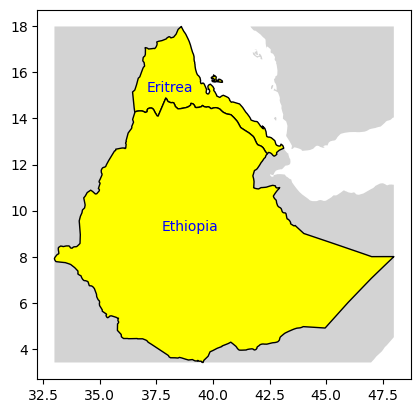

In [38]:
#now i can use that info to plot:
base=miniWorld.plot(color='lightgrey')
healthycountries.plot(color='yellow', edgecolor='black',ax=base)
for idx, row in healthycountries.iterrows():
   plt.annotate(text=row['name'], xy=row['coordinates'], horizontalalignment='center', color='blue')